# Part -1 Feature Engineering ###

In [131]:
# Read Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
%matplotlib inline
import seaborn as sns
import warnings  
import datetime as dt
import scipy.stats as st    

In [2]:
# Set Display parameters
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


In [3]:
# Change working directory
#os.chdir(r'C:\Users\SHALESH\Desktop\Assignment -1')

In [1]:
# Get List of files in working directory 
# os.listdir()

In [5]:
# Note about data
# Land Square feet is the living home area enclosed by the gross square area within the boundaries

In [6]:
# Read Raw File
NYC_sales= pd.read_csv("nyc-rolling-sales.csv", index_col=0)
NYC_sales.reset_index(inplace = True) 
NYC_sales.head(3)  

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [36]:
data=NYC_sales.copy()

In [37]:
data.drop(columns=['index'],inplace=True)

In [38]:
data.shape

(84548, 21)

In [39]:
# Check function argument list in Jupyter
# shift+tab+tab before ( function bracket

In [40]:
# Create a new column "year of sale" by extracting year information from "SALE DATE" column  (to_period: apply date format to output)
data['YEAR_OF_SALE'] = pd.to_datetime(data['SALE DATE']).dt.to_period('Y')
data.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR_OF_SALE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,2016
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,2016


In [41]:
print(data['YEAR_OF_SALE'].value_counts())
print('')
print(data['YEAR_OF_SALE'].value_counts(normalize = True)*100)

2017    55055
2016    29493
Freq: A-DEC, Name: YEAR_OF_SALE, dtype: int64

2017    65.116857
2016    34.883143
Freq: A-DEC, Name: YEAR_OF_SALE, dtype: float64


##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> The Housing price data comprise of sale amount which depends upon various location factors.  </font> </i>
   - <i><font color=brown> Sale Year is created to pull summary for each year</font>
   - <i><font color=brown> Most houses were sold in the year 2017 as compared to 2016 by 25k </font> </i>
   - <i><font color=brown> 2016 had almost half of the house sales as compared to 2017 in New York  </font>
  </i></u></b> </font>    

In [42]:
# Drop "SALE DATE" column to reduce data redundancy
data1 = data.drop('SALE DATE',axis =1)
data1.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,YEAR_OF_SALE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016


In [59]:
data1['TAX CLASS AT PRESENT'].nunique()

11

In [48]:
for i in data1:
    print(i)

BOROUGH
NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BLOCK
LOT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
ZIP CODE
RESIDENTIAL UNITS
COMMERCIAL UNITS
TOTAL UNITS
LAND SQUARE FEET
GROSS SQUARE FEET
YEAR BUILT
TAX CLASS AT TIME OF SALE
BUILDING CLASS AT TIME OF SALE
SALE PRICE
YEAR_OF_SALE
PRESENT_TAX_1
PRESENT_TAX_1A
PRESENT_TAX_1B
PRESENT_TAX_1C
PRESENT_TAX_2
PRESENT_TAX_2A
PRESENT_TAX_2B
PRESENT_TAX_2C
PRESENT_TAX_3
PRESENT_TAX_4


In [55]:
data1['TAX CLASS AT PRESENT'].value_counts(normalize=True)

1     0.457147
2     0.367677
4     0.070672
2A    0.029624
2C    0.022790
1A    0.017132
1B    0.014350
2B    0.009543
      0.008848
1C    0.002182
3     0.000036
Name: TAX CLASS AT PRESENT, dtype: float64

In [68]:
# Create dummy variables for 'TAX CLASS AT PRESENT' predictor variable

data2 = pd.get_dummies(data1['TAX CLASS AT PRESENT'],prefix='PRESENT_TAX',drop_first=True)
data1 = pd.concat([data1, data2],axis=1).reset_index(drop=True)
data1 = data1.loc[:,~data1.columns.duplicated()]
data1.shape  

(83415, 31)

In [70]:
data1.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,YEAR_OF_SALE,PRESENT_TAX_1,PRESENT_TAX_1A,PRESENT_TAX_1B,PRESENT_TAX_1C,PRESENT_TAX_2,PRESENT_TAX_2A,PRESENT_TAX_2B,PRESENT_TAX_2C,PRESENT_TAX_3,PRESENT_TAX_4
0,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,,10009.0,5.0,0.0,5.0,1633,6440,1900.0,2.0,C2,6625000,2017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616,18690,1900.0,2.0,C7,-,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212,7803,1900.0,2.0,C7,-,2016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:
cols=['PRESENT_TAX_1','PRESENT_TAX_1A','PRESENT_TAX_1B','PRESENT_TAX_1C','PRESENT_TAX_2','PRESENT_TAX_2A','PRESENT_TAX_2B','PRESENT_TAX_2C','PRESENT_TAX_3','PRESENT_TAX_4']
for i in cols:
    y=data1[i].value_counts()
    print('')
    print(y)
    print('')


0.0    45281
1.0    38132
Name: PRESENT_TAX_1, dtype: int64


0.0    81984
1.0     1429
Name: PRESENT_TAX_1A, dtype: int64


0.0    82216
1.0     1197
Name: PRESENT_TAX_1B, dtype: int64


0.0    83231
1.0      182
Name: PRESENT_TAX_1C, dtype: int64


0.0    52744
1.0    30669
Name: PRESENT_TAX_2, dtype: int64


0.0    80942
1.0     2471
Name: PRESENT_TAX_2A, dtype: int64


0.0    82617
1.0      796
Name: PRESENT_TAX_2B, dtype: int64


0.0    81512
1.0     1901
Name: PRESENT_TAX_2C, dtype: int64


0.0    83410
1.0        3
Name: PRESENT_TAX_3, dtype: int64


0.0    77518
1.0     5895
Name: PRESENT_TAX_4, dtype: int64



##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> The prefix of the dummy variable has been named according to the tax class at present </font> </i>
   - <i><font color=brown> The column index has been resetted </font>
  </i></u></b> </font>    

# Part -2 Hypothesis Testing ###

In [80]:
data3 = pd.read_csv("gestational_study.csv", index_col=0) # Avoid creating index as a column using index_col=0
data3.reset_index(inplace = True) 
data3.head()  

,Infant_id,Gestational_Age,Birth_Weight
0,1,35.0,1895
1,2,36.0,2030
2,3,29.0,1440
3,4,40.0,2835
4,5,36.0,3090


In [81]:
data3.shape

(17, 3)

In [82]:
data3.describe()

,Infant_id,Gestational_Age,Birth_Weight
count,17.000000,17.000000,17.000000
mean,9.000000,38.376471,2902.000000
std,5.049752,3.163765,696.763052
min,1.000000,29.000000,1440.000000
25%,5.000000,37.000000,2680.000000
50%,9.000000,39.000000,3090.000000
75%,13.000000,40.000000,3345.000000
max,17.000000,42.000000,3827.000000


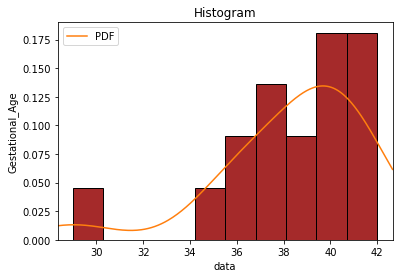

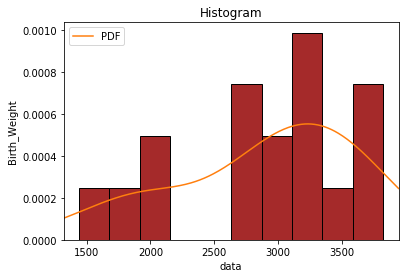

In [128]:
cols=list(data3.columns)
cols
cols.remove('Infant_id')
cols

for i in cols:
    f = plt.figure()
    plt.hist(data3[i],facecolor='brown',edgecolor='black',bins=10,density=True)
    
    plt.ylabel(i)
    plt.xlabel('data')
    plt.title("Histogram")
    
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(data3[i])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    plt.legend(loc="upper left")
    plt.show()  

##### <font color=brown> <b><u><i> Key Insight:-
   - Gestational age is left skewed and birth weight is close to normal distribution</font> </i>
   </i></u></b> </font>    

In [104]:
cols[0:2]

['Gestational_Age', 'Birth_Weight']

In [117]:
# Calculate the correlation between Gestational Age and Birth Weight (use the corr() function in
# Pandas to calculate the correlation).

# Get correlation coefficient
df = pd.DataFrame(data3,columns=cols[0:2])

corrMatrix = df.corr(method='pearson')  
# print(corrMatrix)

corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)  
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Gestational_Age,Birth_Weight
Gestational_Age,1.00,0.82
Birth_Weight,0.82,1.00


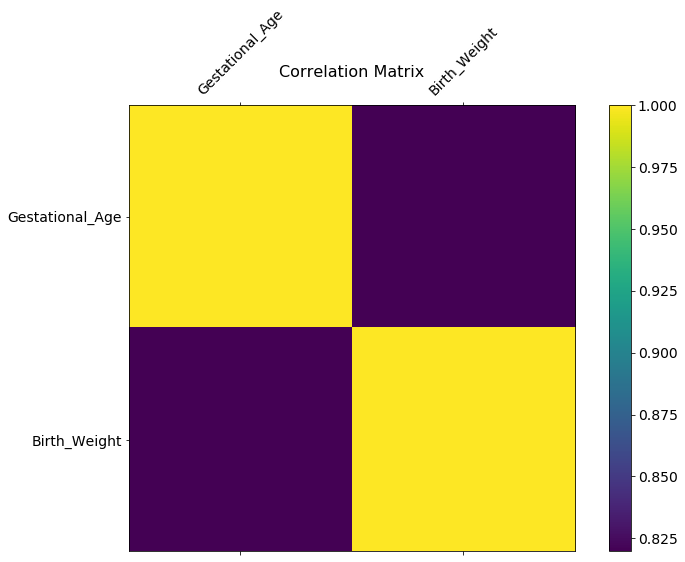

In [113]:
# Get correlation matrix
f = plt.figure(figsize=(12,8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

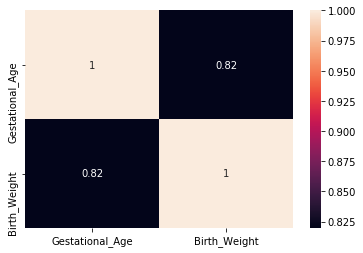

In [133]:
sns.heatmap(corrMatrix, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

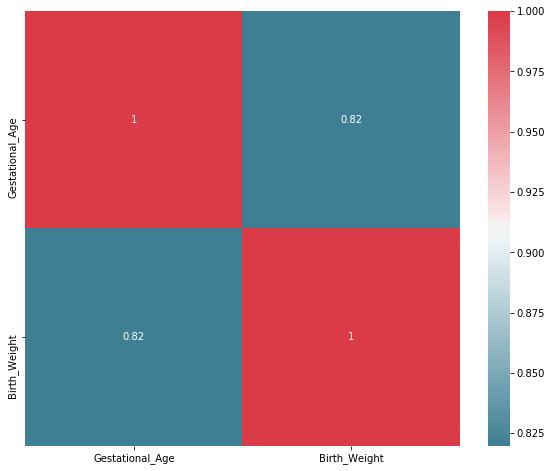

In [134]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrMatrix, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

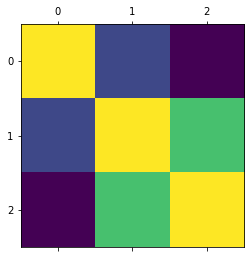

In [136]:
plt.matshow(data3.corr())
plt.show()

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> As the gestational period increases, the birth rate also increases. </font> </i>
   - <i><font color=brown> The pearson's corelational coeffiecient shows a positive correlation between the two variables. </font>
  </i></u></b> </font>    

In [7]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

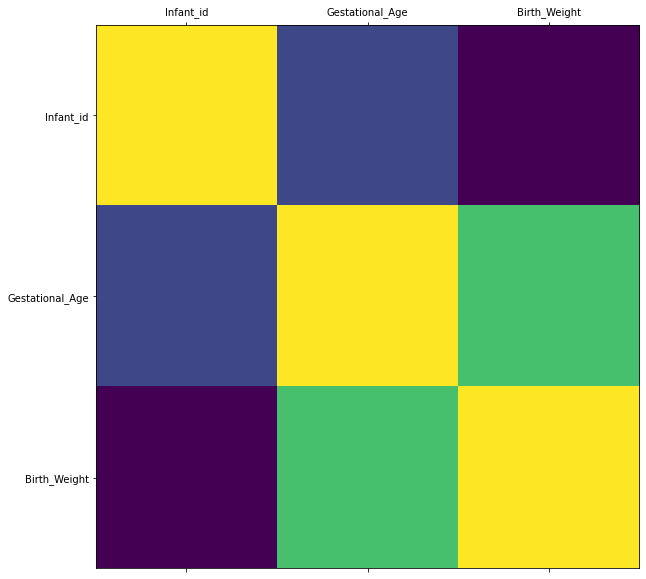

In [8]:
plot_corr(data2,size = 10)

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> The birth rate and gestational rate are correlated with maximum values </font> </i>

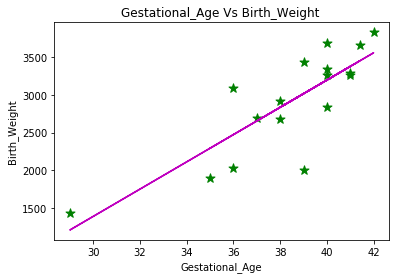

In [158]:
# Generate a scatter plot to visualize the relationships between these two variables. 
# Does the scatter plot confirm the correlation value you calculated? 
# Does there seem to be a strong correlation between the two predictors?

plt.scatter(data3["Gestational_Age"],data3["Birth_Weight"],s=[90],marker='*',c='green')

z = np.polyfit(data3["Gestational_Age"],data3["Birth_Weight"], 1)
p = np.poly1d(z)
plb.plot(data3["Gestational_Age"], p(data3["Gestational_Age"]), 'm-')

plt.title("Gestational_Age Vs Birth_Weight ")
plt.ylabel("Birth_Weight")
plt.xlabel("Gestational_Age");  

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Yes, the scatter plot confirms the correlation value is cose enough to the linear relation between the predictors. </font> </i>
   - <i><font color=brown> Yes, the graph shows a strong positive correlation. </font>
  </i></u></b> </font>    

# Perform a hypothesis test and state the confidence level at which you can confirm a correlation between the two variables 


In [159]:
from scipy import stats
import math

In [170]:
mean_age = data3["Gestational_Age"].mean()
print("mean_age=",mean_age)

sigma_age = data3["Gestational_Age"].std()
print("sigma=",sigma)

mean_age= 38.37647058823529
sigma= 3.163765440848275


# Calculating for 95% confidence intervals 

In [171]:
lower_bound, upper_bound = stats.norm.interval(0.95, loc=mean_age, scale=sigma_age/math.sqrt(5))

In [172]:
print("lower_bound=",lower_bound)

lower_bound= 35.60335886623457


In [173]:
print("upper_bound=",upper_bound)

upper_bound= 41.14958231023601


##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> The lower and upper values for 95% confidence levels are 35.6 & 41.1 respectively </font> </i>   

# Calculating for 99% confidence intervals 

In [174]:
lower_bound, upper_bound = stats.norm.interval(0.99, loc=mean_age, scale=sigma_age/math.sqrt(5))

In [175]:
print("lower_bound=",lower_bound)

lower_bound= 34.73198400996755


In [176]:
print("upper_bound=",upper_bound)

upper_bound= 42.02095716650304


##### <font color=brown> <b><u><i> Key Insight:-  
   - <i><font color=brown> The lower and upper values for 99% confidence levels are 34.72 & 42.01 respectively </font> </i>   

##### <font color=brown> <b><u><i> Key Insight & Reasoning:-
   - <i><font color=brown> I am 99% confident, that true mean gestation age lie between 34 and 42 with only 1% error rate </font> </i>   